# **Problem Statement**
**Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of the day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
"Divy@Narayan"

'Divy@Narayan'

**Connecting to the drive**

In [2]:
#connecting to the google drive
#from google.colab import drive 
#drive.mount ("/content/drive")

**Importing the reuired libraries**

In [3]:
#importing the required Libraries for Exploratory Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from datetime import date
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

**Loading the dataset**

In [4]:
#importing the dataset
#data = pd.read_csv("/content/drive/MyDrive/Capstone/Machine Learning/Data/Supervised/
#Regression/SeoulBikeData.csv", encoding='ISO-8859-1')

data = pd.read_csv('SeoulBikeData.csv', encoding='ISO-8859-1')
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
#size of the dataset
data.shape 

(8760, 14)

In [6]:
#following are the available columns
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [7]:
#finding the number of unique values in the whole dataset
data.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [8]:
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [9]:
#showing the data type of features
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

# **Data Cleaning**

**Checking for null values**

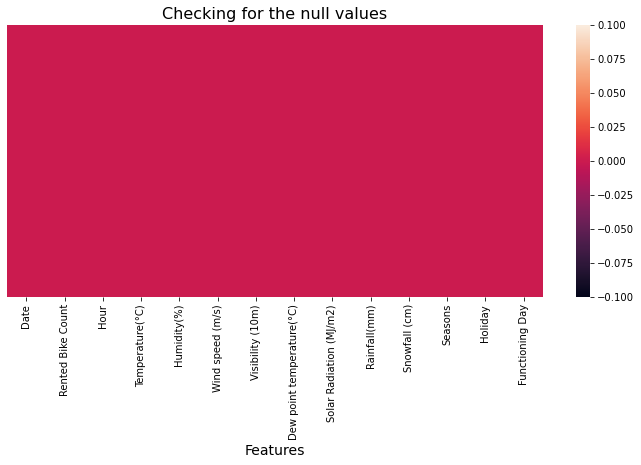

In [10]:
#visualization of NaN values
plt.figure(figsize=(12,5))
sns.heatmap(data.isnull(), yticklabels=False)
plt.title('Checking for the null values', size=16)
plt.xlabel('Features', size=14)
plt.show()

# **Data Visualization**

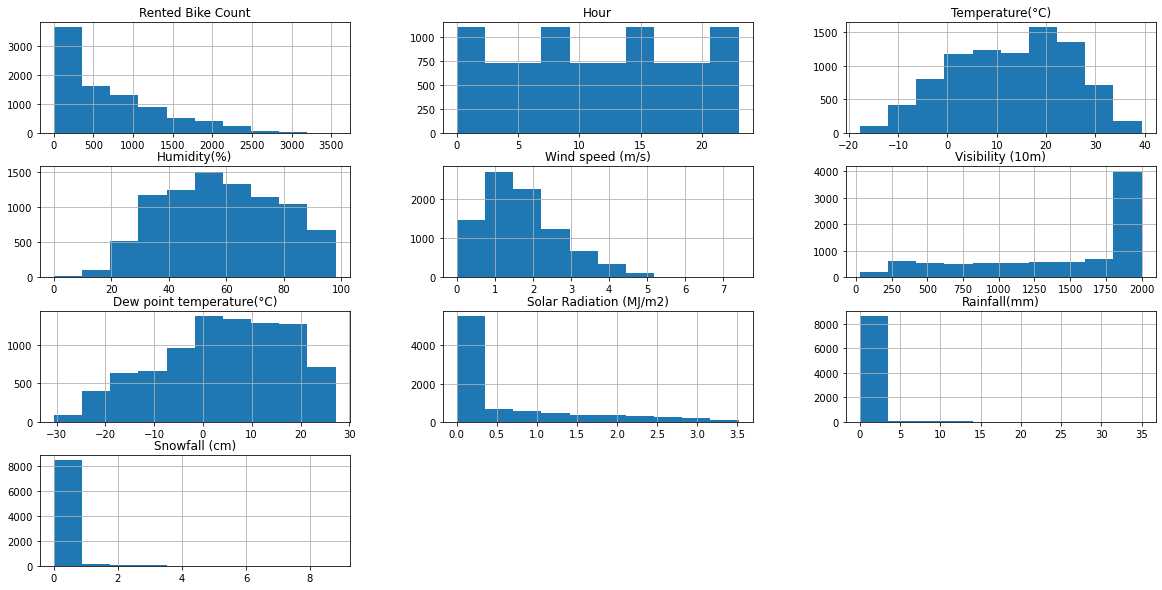

In [11]:
#visualization of distribution of whole data in histogram
data.hist(figsize=(20, 10))
plt.show()

In [12]:
#changing the format of date and adding some columns for analysis
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Day_name'] = data['Date'].dt.day_name()

In [13]:
#dataframe after adding the columns
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day,Day_name
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday


**Correlation Heatmap**

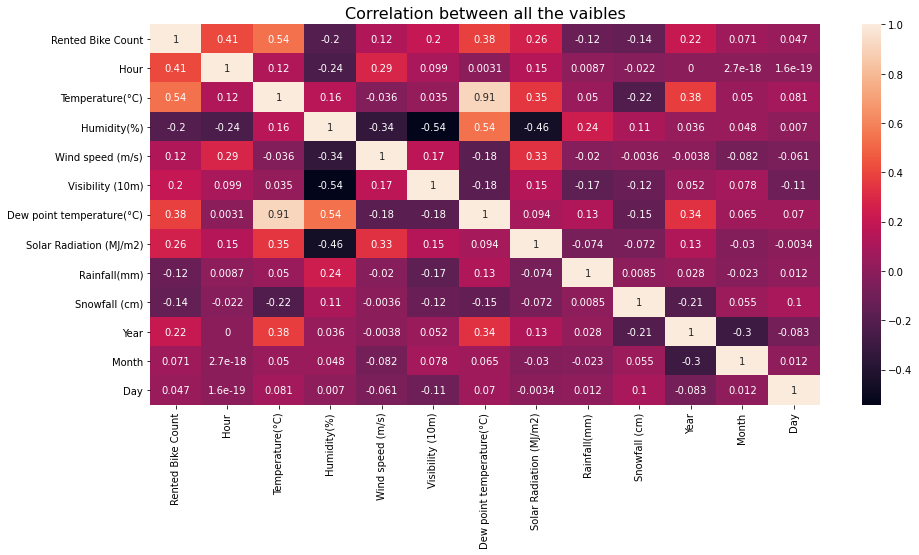

In [14]:
#visualization of the correlation in the heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation between all the vaibles', size=16)
plt.show()

**Table showing the correlation between all the features with the Rented Bike Count**

In [15]:
#checking the correlation between all the features with Close price
correlation = data.corr()
var_corr = correlation[['Rented Bike Count']]
var_corr 

,Rented Bike Count
Rented Bike Count,1.000000
Hour,0.410257
Temperature(°C),0.538558
Humidity(%),-0.199780
Wind speed (m/s),0.121108
Visibility (10m),0.199280
Dew point temperature(°C),0.379788
Solar Radiation (MJ/m2),0.261837
Rainfall(mm),-0.123074
Snowfall (cm),-0.141804


**Checking for Outliers**

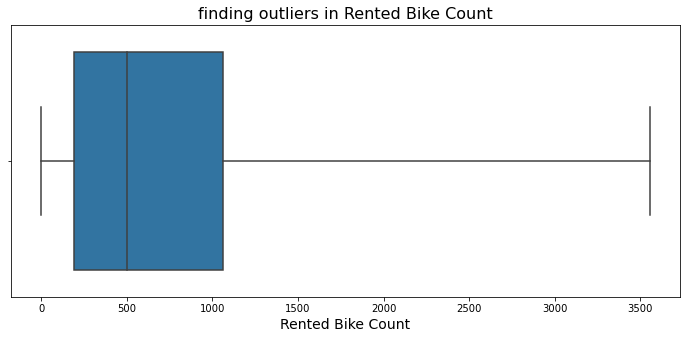

In [16]:
#checking for outliers
plt.figure(figsize=(12,5))
sns.boxplot(data=data, x='Rented Bike Count', whis=3)
plt.title('finding outliers in Rented Bike Count', size=16)
plt.xlabel('Rented Bike Count', size=14)
plt.show()

**Density plot of Rented Bike Count**

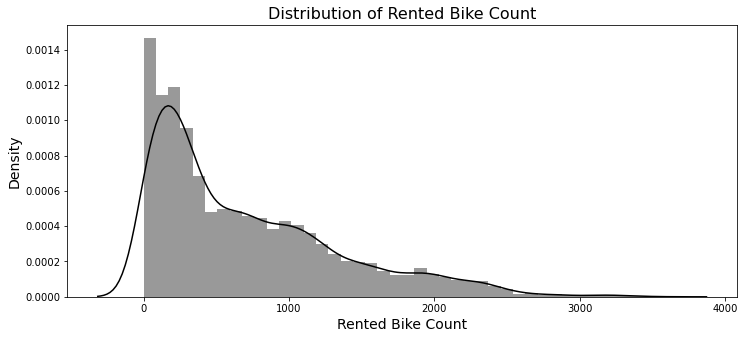

In [17]:
plt.figure(figsize=(12,5))
sns.distplot(data['Rented Bike Count'], color='k')
plt.title('Distribution of Rented Bike Count', size=16)
plt.xlabel('Rented Bike Count', size=14)
plt.ylabel('Density', size=14)
plt.show()

In [18]:
print("Skewness: %f" % data['Rented Bike Count'].skew())
print("Kurtosis: %f" % data['Rented Bike Count'].kurt())

Skewness: 1.153428
Kurtosis: 0.853387


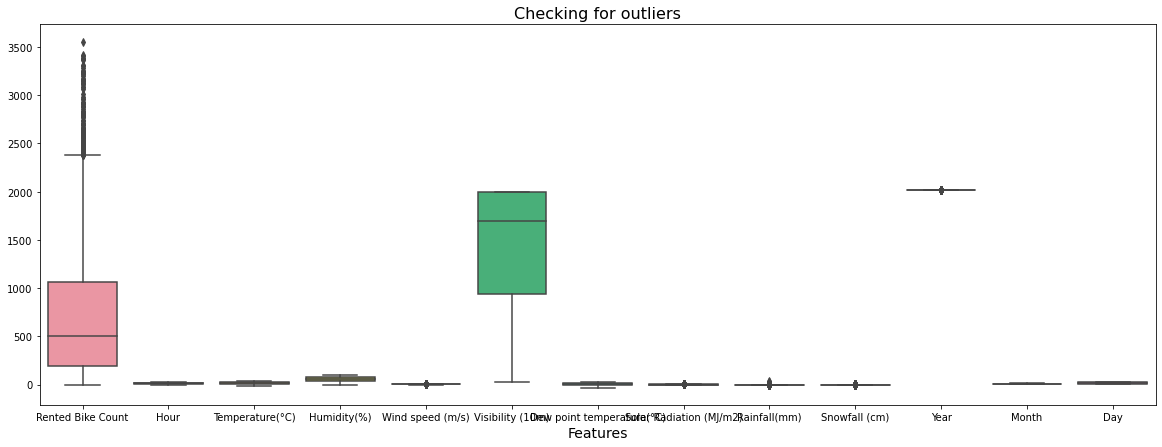

In [19]:
#checking for outliers
plt.figure(figsize=(20,7))
sns.boxplot(data=data)
plt.title('Checking for outliers', size=16)
plt.xlabel('Features', size=14)
plt.show()

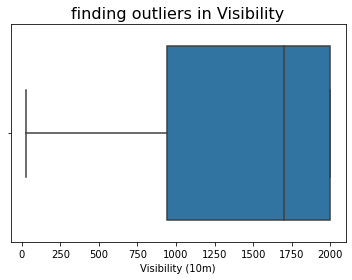

In [20]:
#checking for outliers
sns.boxplot(data=data, x='Visibility (10m)', whis=3)
plt.title('finding outliers in Visibility', size=16)
plt.show()

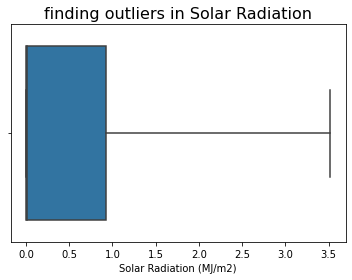

In [21]:
#checking for outliers
sns.boxplot(data=data, x='Solar Radiation (MJ/m2)', whis=3)
plt.title('finding outliers in Solar Radiation', size=16)
plt.show()

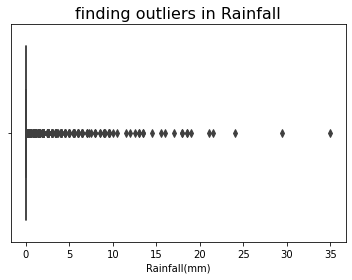

In [22]:
#checking for outliers
sns.boxplot(data=data, x='Rainfall(mm)', whis=3)
plt.title('finding outliers in Rainfall', size=16)
plt.show()

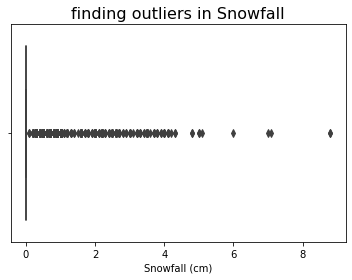

In [23]:
#checking for outliers
sns.boxplot(data=data, x='Snowfall (cm)', whis=3)
plt.title('finding outliers in Snowfall', size=16)
plt.show()

In [24]:
#renaming the columns
data['Visibility'] = data['Visibility (10m)'].apply(lambda x: 1 if x >= 2000 else 0)
data['Solar Radiation'] = data['Solar Radiation (MJ/m2)'].apply(lambda x: 1 if x >= 0.56 else 0)
data['Rainfall'] = data['Rainfall(mm)'].apply(lambda x: 1 if x > 0.15 else 0)
data['Snowfall'] = data['Snowfall (cm)'].apply(lambda x: 1 if x > 0.75 else 0)

By observing the above outlier boxplots the distinction was made

In [25]:
data.rename(columns={'Dew point temperature(°C)':'Dew point temperature', 'Wind speed (m/s)':'Wind speed', 
                     'Humidity(%)':'Humidity', 'Temperature(°C)':'Temperature'}, inplace = True)

In [26]:
#changing the chategorical features into the numerical features
data['Functioning_day'] = data['Functioning Day'].apply(lambda x: 1 if x == 'Yes' else 0)
data['HoliDay'] = data['Holiday'].apply(lambda x: 1 if x == 'Holiday' else 0)

**Functioning day Vs Rented Bike count Vs Hours**

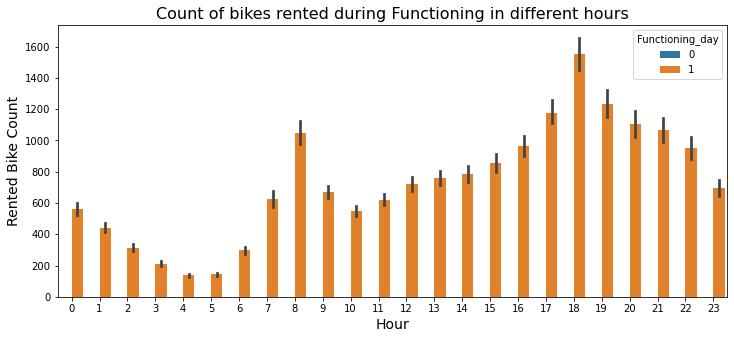

In [27]:
#Functioning day value counts
plt.figure(figsize=(12,5))
sns.barplot(x='Hour', hue='Functioning_day', y='Rented Bike Count', data=data)
plt.title("Count of bikes rented during Functioning in different hours", size=16)
plt.xlabel("Hour", size=14)
plt.ylabel("Rented Bike Count", size=14)
plt.show()

We can see that there are no bikes are rented on non functioning day

**Functioning day Vs Value counts**

In [28]:
data['Functioning_day'].value_counts()

1    8465
0     295
Name: Functioning_day, dtype: int64

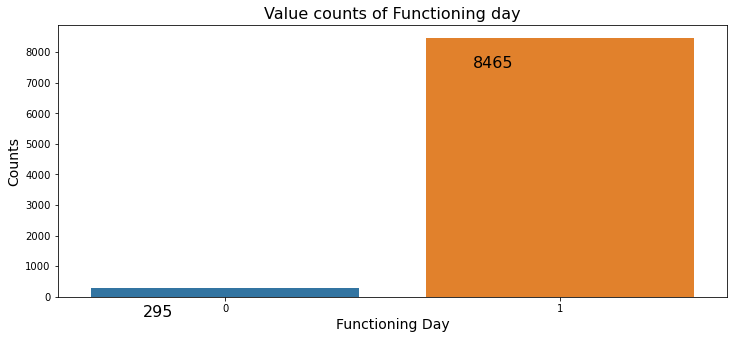

In [29]:
plt.figure(figsize=(12, 5))
ch = sns.countplot(data['Functioning_day'])
plt.xlabel('Functioning Day', size=14)
plt.ylabel('Counts', size=14)
plt.title('Value counts of Functioning day', size=16)
for p in ch.patches:
    ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)
plt.show()

Eventhough we have records on non functioning day the rented bike count is 0

In [30]:
data = data[data['Functioning_day']!=0]

So, thats better to drop the non functioning day data

**Holiday Vs Rented Bike count Vs Hours**

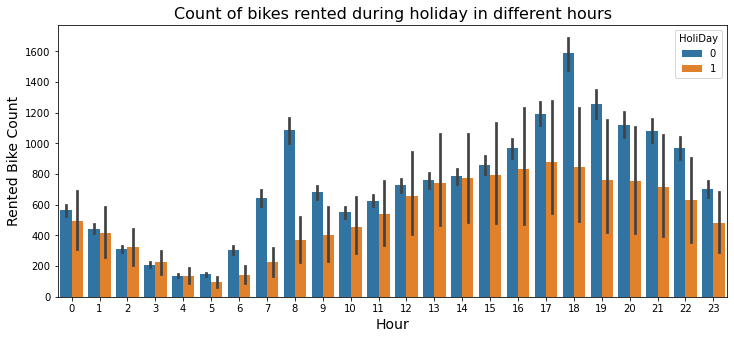

In [31]:
plt.figure(figsize=(12,5))
sns.barplot(x='Hour', y='Rented Bike Count', hue='HoliDay', data=data)
plt.title("Count of bikes rented during holiday in different hours", size=16)
plt.xlabel("Hour", size=14)
plt.ylabel("Rented Bike Count", size=14)
plt.show()

The above figure shows the bike rented count during holidays in different hours

**Snowfall Vs Rented Bike count Vs Hours**

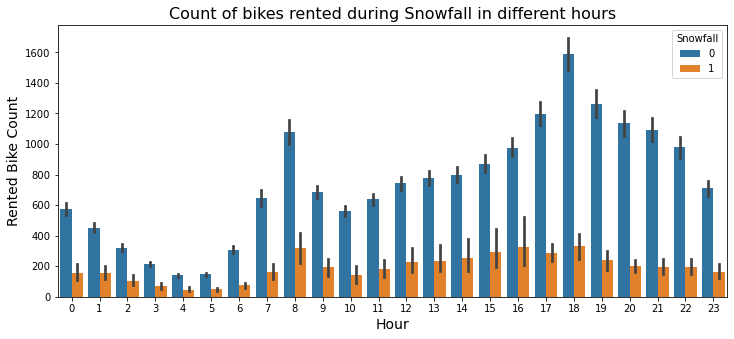

In [32]:
plt.figure(figsize=(12,5))
sns.barplot(x='Hour', y='Rented Bike Count', hue='Snowfall', data=data)
plt.title("Count of bikes rented during Snowfall in different hours", size=16)
plt.xlabel("Hour", size=14)
plt.ylabel("Rented Bike Count", size=14)
plt.show()

The above figure shows the bike rented count during snowfall in different hours

**Rainfall Vs Rented Bike count Vs Hours**

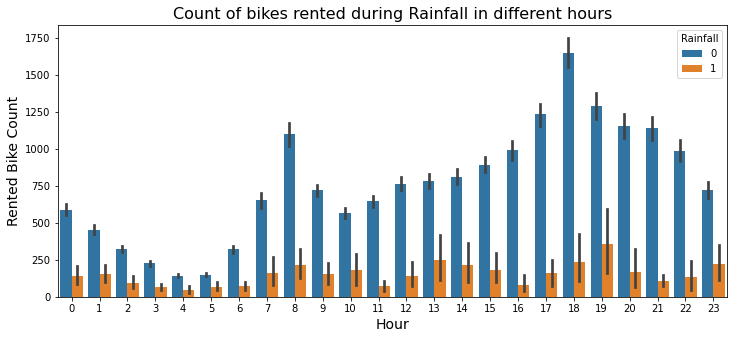

In [33]:
plt.figure(figsize=(12,5))
sns.barplot(x='Hour', y='Rented Bike Count', hue='Rainfall', data=data)
plt.title("Count of bikes rented during Rainfall in different hours", size=16)
plt.xlabel("Hour", size=14)
plt.ylabel("Rented Bike Count", size=14)
plt.show()

The above figure shows the bike rented count during rainfall in different hours

**Seasons vs Rented Bike Count vs Hour**

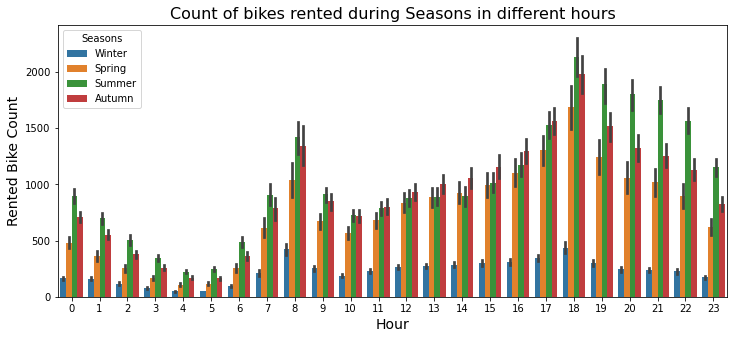

In [34]:
plt.figure(figsize=(12,5))
sns.barplot(x='Hour', y='Rented Bike Count', hue='Seasons', data=data)
plt.title("Count of bikes rented during Seasons in different hours", size=16)
plt.xlabel("Hour", size=14)
plt.ylabel("Rented Bike Count", size=14)
plt.show()

**Visibility vs Rented Bike Count vs Hour**

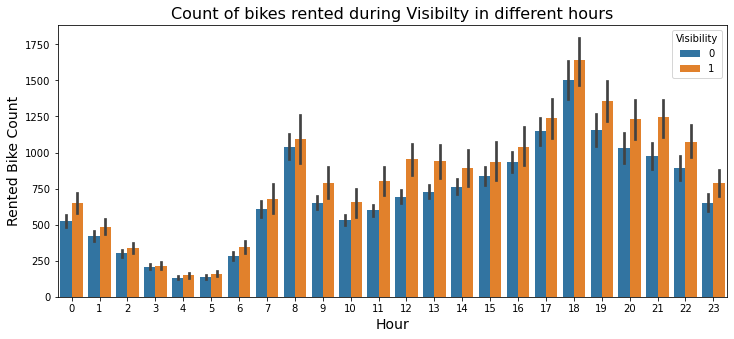

In [35]:
plt.figure(figsize=(12,5))
sns.barplot(x='Hour', y='Rented Bike Count', hue='Visibility', data=data)
plt.title("Count of bikes rented during Visibilty in different hours", size=16)
plt.xlabel("Hour", size=14)
plt.ylabel("Rented Bike Count", size=14)
plt.show()

In [36]:
#selecting some features for analysis
parameters = ['Month', 'Day', 'Day_name', 'Hour', 'HoliDay', 'Visibility',
              'Solar Radiation', 'Rainfall', 'Snowfall', 'Seasons', 'Year']

**Visualization of value counts**

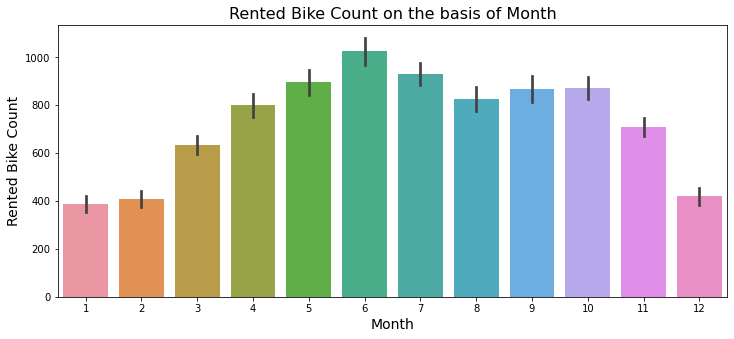

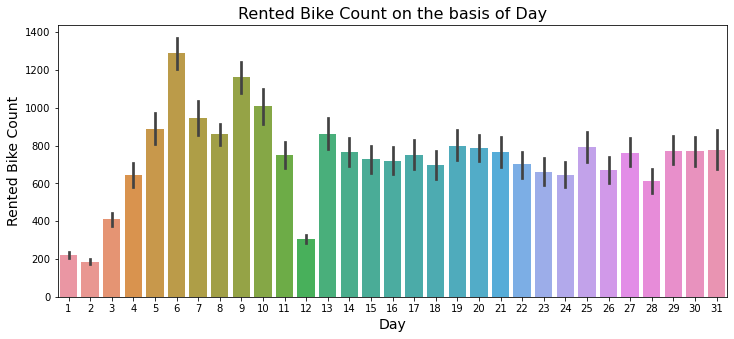

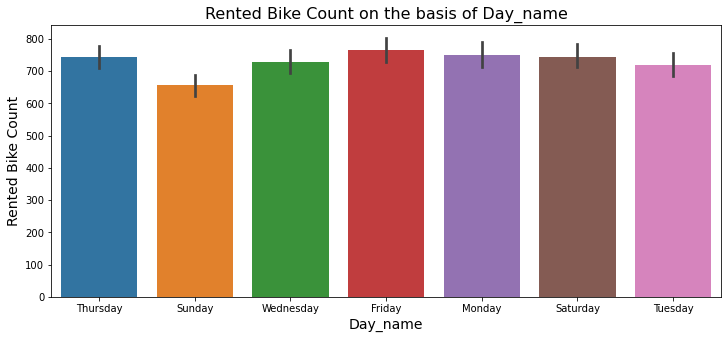

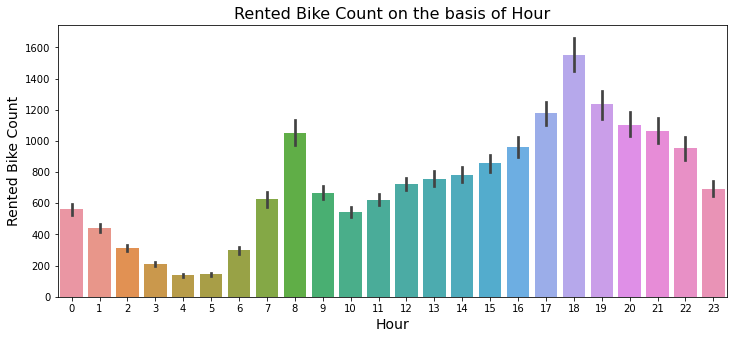

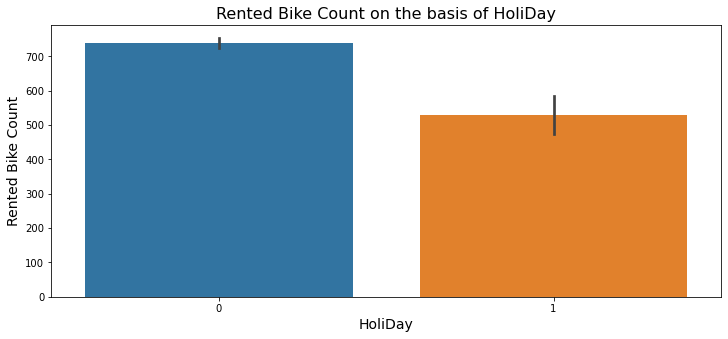

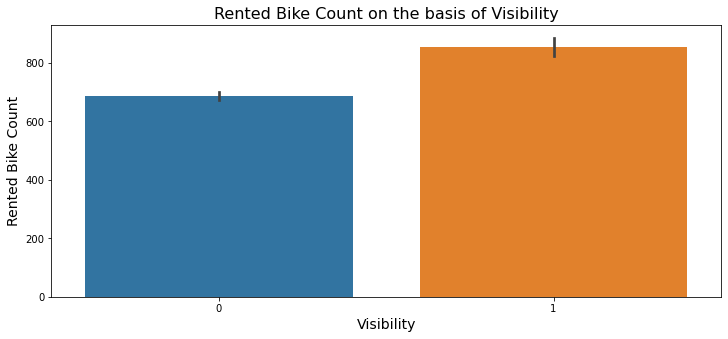

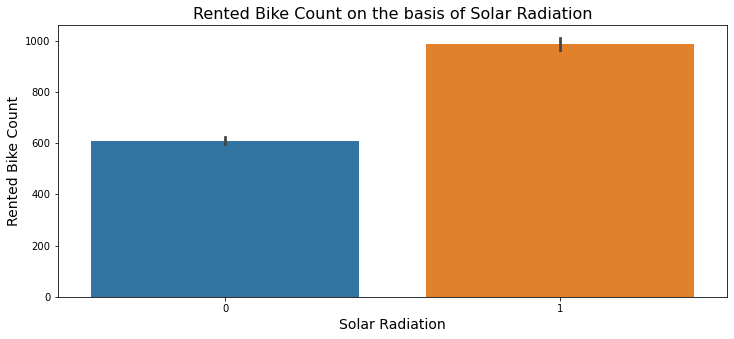

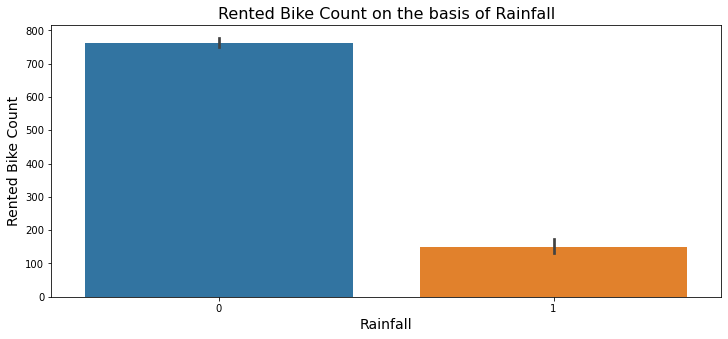

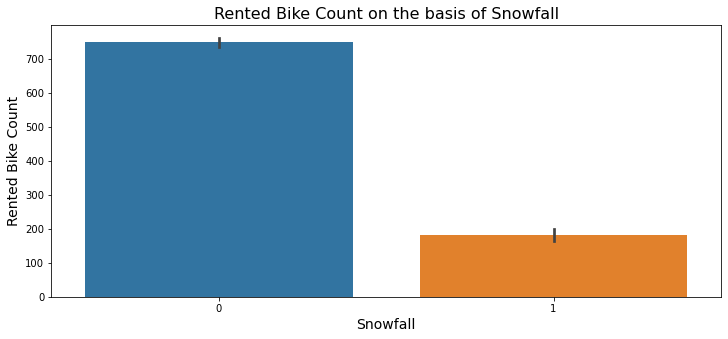

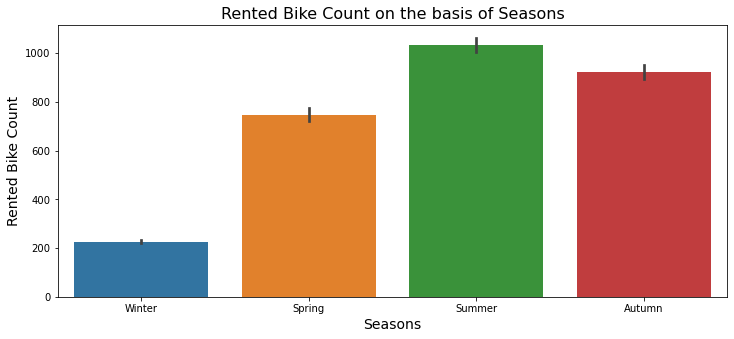

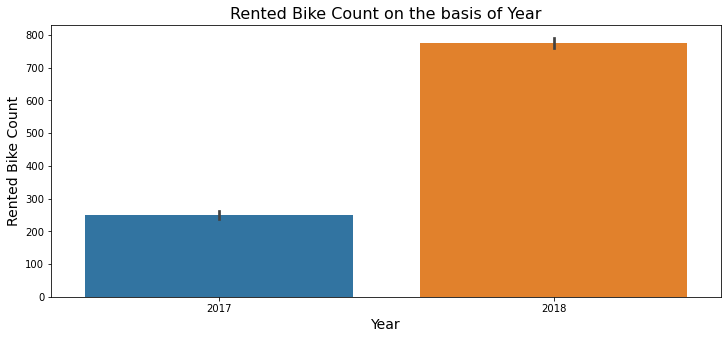

In [37]:
#visualization of the value counts
for col in parameters:
    fig = plt.figure(figsize=(12, 5))
    ax = fig.gca()
    feature = 'Rented Bike Count'
    ch = sns.barplot(x=col, y=feature, data=data, ax=ax)
    plt.xlabel(col, size=14)
    plt.ylabel(feature, size=14)
    plt.title(f"Rented Bike Count on the basis of {col}", size=16)
    plt.show()

**Value counts of Holiday**

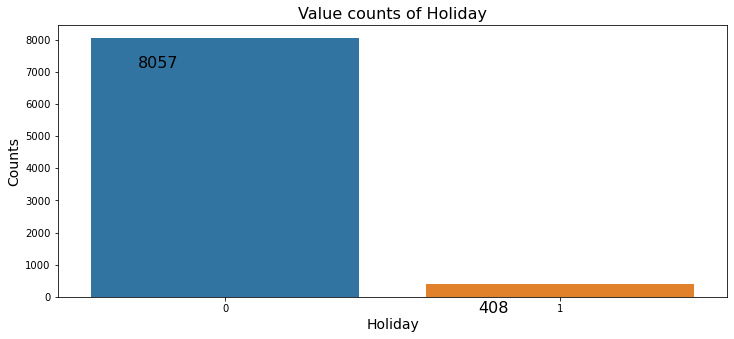

In [38]:
plt.figure(figsize=(12, 5))
ch = sns.countplot(data['HoliDay'])
plt.xlabel('Holiday', size=14)
plt.ylabel('Counts', size=14)
plt.title('Value counts of Holiday', size=16)
for p in ch.patches:
    ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)
plt.show()

**Value counts of Rainfall**

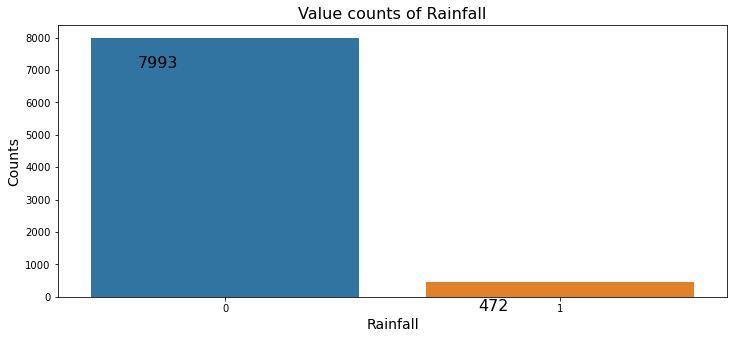

In [39]:
plt.figure(figsize=(12, 5))
ch = sns.countplot(data['Rainfall'])
plt.xlabel('Rainfall', size=14)
plt.ylabel('Counts', size=14)
plt.title('Value counts of Rainfall', size=16)
for p in ch.patches:
    ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)
plt.show()

**Value counts of Solar Radiation**

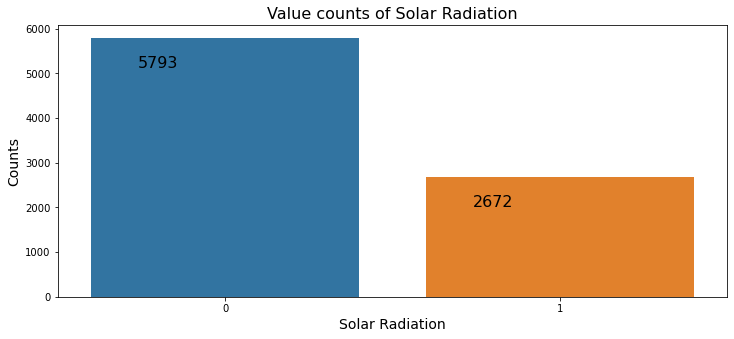

In [40]:
plt.figure(figsize=(12, 5))
ch = sns.countplot(data['Solar Radiation'])
plt.xlabel('Solar Radiation', size=14)
plt.ylabel('Counts', size=14)
plt.title('Value counts of Solar Radiation', size=16)
for p in ch.patches:
    ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)
plt.show()

**Value counts of Snowfall**

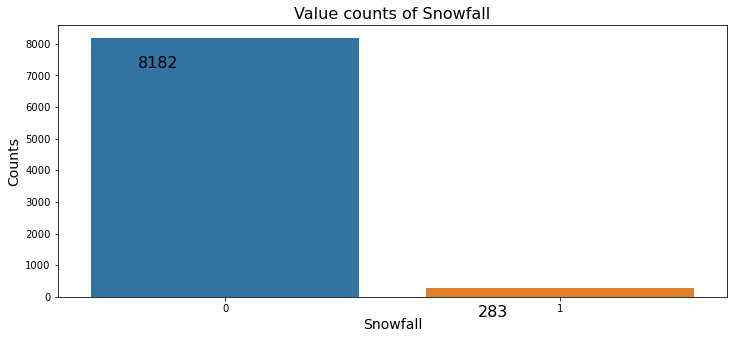

In [41]:
plt.figure(figsize=(12, 5))
ch = sns.countplot(data['Snowfall'])
plt.xlabel('Snowfall', size=14)
plt.ylabel('Counts', size=14)
plt.title('Value counts of Snowfall', size=16)
for p in ch.patches:
    ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)
plt.show()

**Value counts of Seasons**

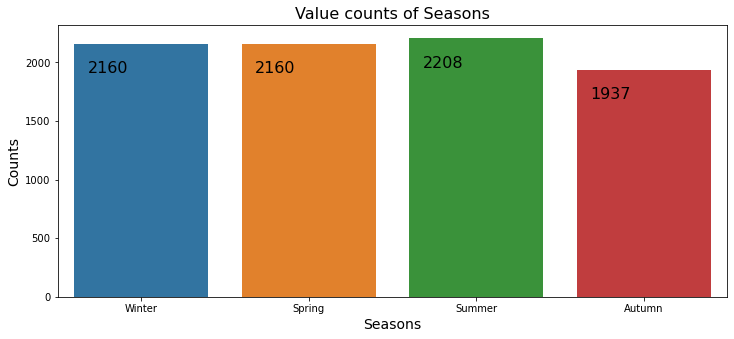

In [42]:
plt.figure(figsize=(12, 5))
ch = sns.countplot(data['Seasons'])
plt.xlabel('Seasons', size=14)
plt.ylabel('Counts', size=14)
plt.title('Value counts of Seasons', size=16)
for p in ch.patches:
    ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)
plt.show()

**Value counts of Year**

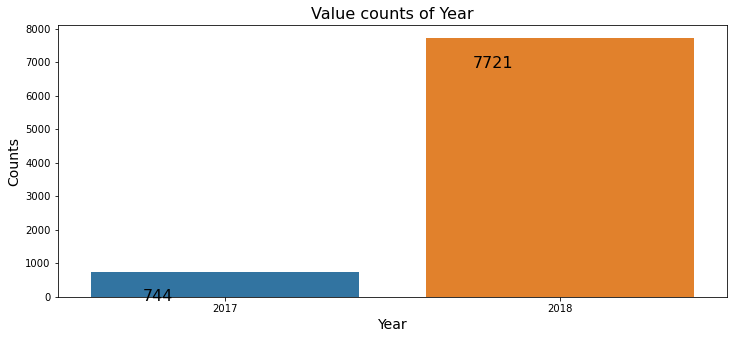

In [43]:
plt.figure(figsize=(12, 5))
ch = sns.countplot(data['Year'])
plt.xlabel('Year', size=14)
plt.ylabel('Counts', size=14)
plt.title('Value counts of Year', size=16)
for p in ch.patches:
    ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)
plt.show()

**Forming a New Data Frame**

In [44]:
#preparing the new data frame with selected columns
bike_df = data[['Year', 'Month', 'Day', 'Day_name', 'Rented Bike Count', 'Hour',  'HoliDay',  'Visibility','Temperature', 
                'Humidity', 'Dew point temperature', 'Solar Radiation', 'Rainfall', 'Snowfall', 'Seasons', 'Wind speed']]

bike_df.head()

,Year,Month,Day,Day_name,Rented Bike Count,Hour,HoliDay,Visibility,Temperature,Humidity,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Wind speed
0,2017,1,12,Thursday,254,0,0,1,-5.2,37,-17.6,0,0,0,Winter,2.2
1,2017,1,12,Thursday,204,1,0,1,-5.5,38,-17.6,0,0,0,Winter,0.8
2,2017,1,12,Thursday,173,2,0,1,-6.0,39,-17.7,0,0,0,Winter,1.0
3,2017,1,12,Thursday,107,3,0,1,-6.2,40,-17.6,0,0,0,Winter,0.9
4,2017,1,12,Thursday,78,4,0,1,-6.0,36,-18.6,0,0,0,Winter,2.3


In [45]:
bike_df.columns

Index(['Year', 'Month', 'Day', 'Day_name', 'Rented Bike Count', 'Hour',
       'HoliDay', 'Visibility', 'Temperature', 'Humidity',
       'Dew point temperature', 'Solar Radiation', 'Rainfall', 'Snowfall',
       'Seasons', 'Wind speed'],
      dtype='object')

In [46]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   8465 non-null   int64  
 1   Month                  8465 non-null   int64  
 2   Day                    8465 non-null   int64  
 3   Day_name               8465 non-null   object 
 4   Rented Bike Count      8465 non-null   int64  
 5   Hour                   8465 non-null   int64  
 6   HoliDay                8465 non-null   int64  
 7   Visibility             8465 non-null   int64  
 8   Temperature            8465 non-null   float64
 9   Humidity               8465 non-null   int64  
 10  Dew point temperature  8465 non-null   float64
 11  Solar Radiation        8465 non-null   int64  
 12  Rainfall               8465 non-null   int64  
 13  Snowfall               8465 non-null   int64  
 14  Seasons                8465 non-null   object 
 15  Wind

In [47]:
#value counts for seasons
bike_df.Seasons.value_counts()

Summer    2208
Winter    2160
Spring    2160
Autumn    1937
Name: Seasons, dtype: int64

**Dummy Variables**

In [48]:
#onehot encoding of seasons 
bike_df['Seasons'] = pd.get_dummies(data['Seasons'], drop_first=True)

In [49]:
#value counts after convering the seasons column into a numerical feature
bike_df['Seasons'].value_counts()

0    6305
1    2160
Name: Seasons, dtype: int64

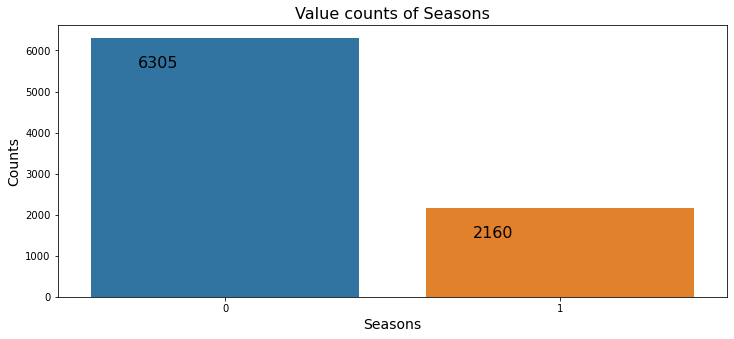

In [50]:
#Value counts for Seasons
plt.figure(figsize=(12, 5))
ch = sns.countplot(bike_df['Seasons'])
plt.xlabel('Seasons', size=14)
plt.ylabel('Counts', size=14)
plt.title('Value counts of Seasons', size=16)
for p in ch.patches:
    ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)
plt.show()

**Variance Inflation Factor**

In [51]:
def cal_vif(X):
  vif = pd.DataFrame()
  vif['Variables'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return vif

In [52]:
cal_vif(bike_df[[i for i in bike_df.describe().columns if i not in['Date', 'Year', 'Temperature']]])

,Variables,VIF
0,Month,4.760655
1,Day,3.878677
2,Rented Bike Count,4.478065
3,Hour,5.020353
4,HoliDay,1.064289
5,Visibility,1.446788
6,Humidity,8.396562
7,Dew point temperature,2.130926
8,Solar Radiation,1.997640
9,Rainfall,1.335496


As Date, Year and Temperature have high correlation score they are dropped from the analysis.

**Dependent and Independent Variables**

In [53]:
#defining dependent and independent variables 
dependent_variable = 'Rented Bike Count'
independent_variable = ['Hour', 'Humidity', 'Wind speed', 'Dew point temperature', 'Month', 'HoliDay',  
                        'Visibility', 'Solar Radiation', 'Rainfall', 'Snowfall', 'Seasons', 'Day']

**Defing the X and y variables**

In [54]:
#defining X and y varaibles 
y = bike_df[dependent_variable]
X = bike_df[independent_variable]

# **Model Implementation**
**Importing the required libraries for Liner Regression Analysis**

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [56]:
#splitting train and test data sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [57]:
#size of train and test datasets
print(f'Size of X_train is: {X_train.shape}')
print(f'Size of X_test is: {X_test.shape}')
print(f'Size of y_train is: {y_train.shape}')
print(f'Size of y_test is: {y_test.shape}')

Size of X_train is: (6772, 12)
Size of X_test is: (1693, 12)
Size of y_train is: (6772,)
Size of y_test is: (1693,)


In [58]:
#scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Linear Regression**

In [59]:
#Creating the Linear regression object
regressor = LinearRegression()
#Train the model using the training set
regressor.fit(X_train, y_train)

LinearRegression()

In [60]:
#linear regression scoe
regressor.score(X_train, y_train)

0.5324397890268355

In [61]:
#defining the predicted values 
pred_train = regressor.predict(X_train)
pred_test = regressor.predict(X_test)

 **Model Evaluation**

In [62]:
MSE_train = mean_squared_error(y_train, pred_train)
print(f'MSE= {MSE_train}')

RMSE_train = np.sqrt(MSE_train)
print(f'RMSE= {RMSE_train}')

R2_Score_train = r2_score(y_train, pred_train)
print(f'R2_Score= {R2_Score_train}')

MSE= 190575.48515363157
RMSE= 436.5495219945059
R2_Score= 0.5324397890268355


In [63]:
MSE_test = mean_squared_error(y_test, pred_test)
print(f'MSE= {MSE_test}')

RMSE_test = np.sqrt(MSE_test)
print(f'RMSE= {RMSE_test}')

R2_Score_test = r2_score(y_test, pred_test)
print(f'R2_Score= {R2_Score_test}')

MSE= 203079.21634792874
RMSE= 450.64311416899375
R2_Score= 0.5303109424436742


**Visualization of trainset output**

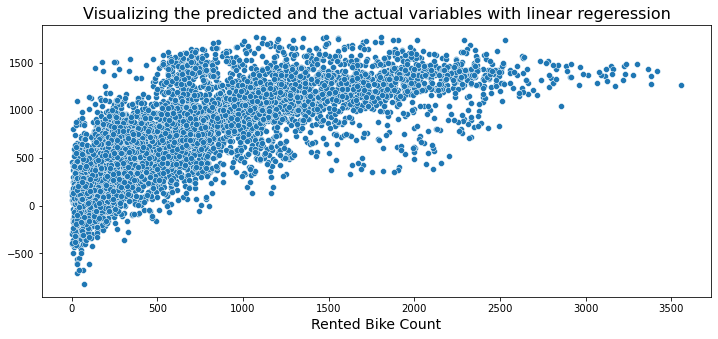

In [64]:
plt.figure(figsize=(12, 5))
sns.scatterplot(y_train, pred_train)
plt.title('Visualizing the predicted and the actual variables with linear regeression', size=16)
plt.xlabel('Rented Bike Count', size=14)
plt.show()

**Visualization of testset output**

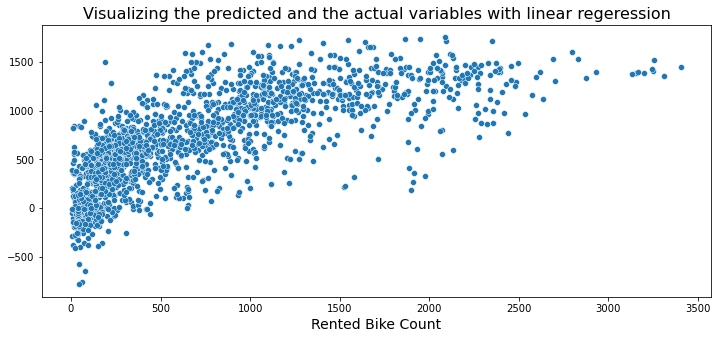

In [65]:
#ploting the outputs
plt.figure(figsize=(12, 5))
sns.scatterplot(y_test, pred_test)
plt.title('Visualizing the predicted and the actual variables with linear regeression', size=16)
plt.xlabel('Rented Bike Count', size=14)
plt.show()

**Review**

The Score for linear regression is around 0.5363 which is near to 1. That means 54% of the model performance is good.

In training set the accuracy score is 53.63%.

While the accuracy score on test data is 51.34%.

Which means the model needs to be trained with more data.

# **Random Forest Regressor**

In [66]:
from sklearn.ensemble import RandomForestRegressor

**Model Implementation**

In [67]:
#implementing the model
rf_reg = RandomForestRegressor(n_estimators = 1000, random_state=42)
#training the model
rf_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [68]:
#defining the predicted variables
pred_train = rf_reg.predict(X_train)
pred_test = rf_reg.predict(X_test)

**Model Evaluation**

In [69]:
MSE_train = mean_squared_error(y_train, pred_train)
print(f'MSE= {MSE_train}')

RMSE_train = np.sqrt(MSE_train)
print(f'RMSE= {RMSE_train}')

R2_Score_train = r2_score(y_train, pred_train)
print(f'R2_Score= {R2_Score_train}')

MSE= 7243.796700926611
RMSE= 85.11049700786978
R2_Score= 0.9822279811540209


In [70]:
MSE_test = mean_squared_error(y_test, pred_test)
print(f'MSE= {MSE_test}')

RMSE_test = np.sqrt(MSE_test)
print(f'RMSE= {RMSE_test}')

R2_Score_test = r2_score(y_test, pred_test)
print(f'R2_Score= {R2_Score_test}')

MSE= 57075.793045832834
RMSE= 238.90540606238451
R2_Score= 0.8679930131350906


**Visualization of trainset output**

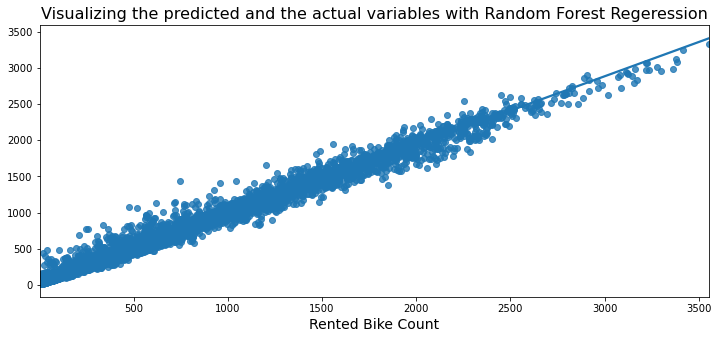

In [71]:
#ploting the outputs
plt.figure(figsize=(12, 5))
sns.regplot(y_train, pred_train)
plt.title('Visualizing the predicted and the actual variables with Random Forest Regeression', size=16)
plt.xlabel('Rented Bike Count', size=14)
plt.show()

**Visualization of testset output**

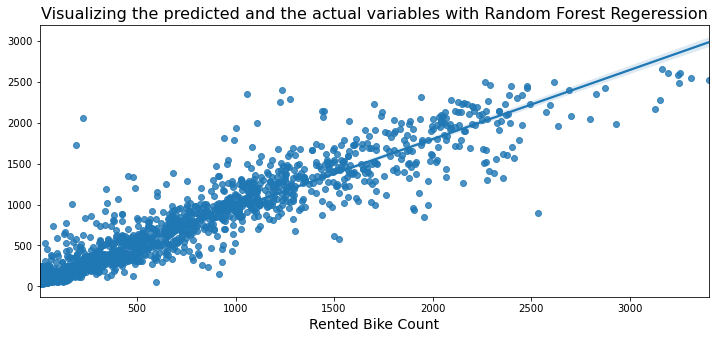

In [72]:
#ploting the outputs
plt.figure(figsize=(12, 5))
sns.regplot(y_test, pred_test)
plt.title('Visualizing the predicted and the actual variables with Random Forest Regeression', size=16)
plt.xlabel('Rented Bike Count', size=14)
plt.show()

**Review**

Random Forest Regressor implementation was done and the model is trained with the data.

Model have the accuracy of 98.22% on train data.

Model have the accuracy of 86.79% on test data in predicting the demand for the bike rentail.

# **Conclusion**



Linear Regression, Lasso Regression, Ridge Regression and Random Forest Regression are used to train the model.

As per the evaluation its better to implement the Random Forest Regression rather that  going for Linear Regression, Lasso, Ridge Regressions. 

When it comes to the accuracy the Random Forest Regression is performing well on the test dataset with the accuracy of 86.79%